# Perspective Tranform
Changing the view of the map from first person to plan view to structure map generation

In [15]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt


## Interactive Image Window
An interactive matplotlib image window is required to obtain more information about the points in the image to establish a transorm from one perspective to the other.

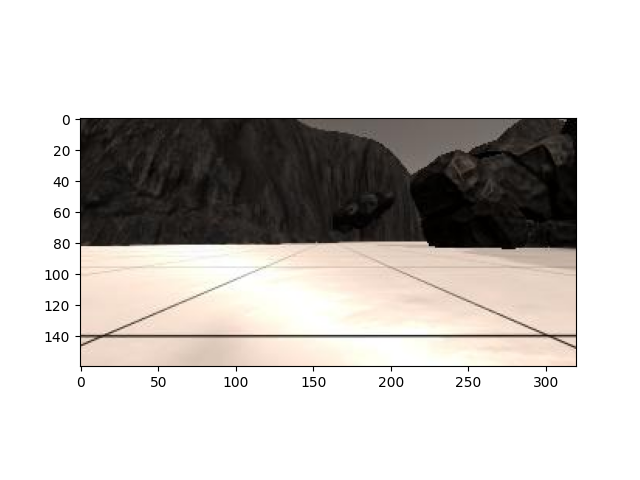

In [20]:
%matplotlib ipympl

img = mpimg.imread("perspective.jpg")
plt.figure()
plt.imshow(img)
plt.show()

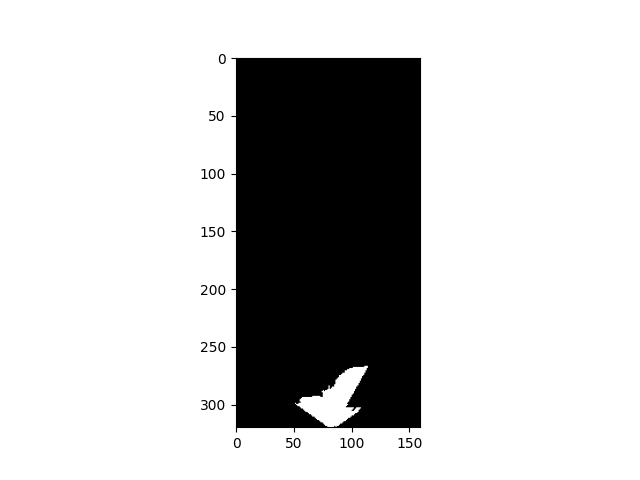

In [21]:
import cv2
import numpy as np

def warp(img):
    width = 5

    pts1 = np.float32([[119,95], [199.3,95], [12.9,141], [300.6,140]])
    pts2 = np.float32([[img.shape[0]/2, img.shape[1]-width], [img.shape[0]/2+width, img.shape[1]-width], [img.shape[0]/2, img.shape[1]], [img.shape[0]/2+width, img.shape[1]]])



    H = cv2.getPerspectiveTransform(pts1, pts2)
    transformed = cv2.warpPerspective(img, H, (img.shape[0], img.shape[1]))
    return transformed

def color_thres(image,  rgb_thres=(150,150,150)):
    shape = ([image.shape[0], image.shape[1], 1])
    canvas = np.zeros(shape)
    thrs = np.asarray(rgb_thres).tolist()
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            if image[y, x, :].tolist() < thrs:
                canvas[y,x] = 0
            else:
                canvas[y,x] = 1
    return canvas

warped = warp(img)
canva = color_thres(warped, (160,160,160))
plt.figure()
plt.imshow(canva, cmap='gray')
plt.show()

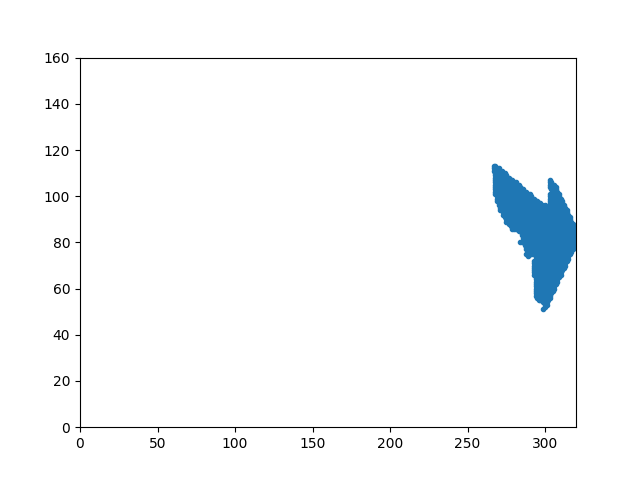

In [22]:
xpos, ypos, _= canva.nonzero()
plt.figure()
plt.plot(xpos, ypos, '.')
plt.xlim(0, 320)
plt.ylim(0, 160)
plt.show() 

In [25]:
canva.shape

(320, 160, 1)